# Global Terrorism Analysis

### Musab Ejaz (232066)
### Hassan Raza (231976)
### Abdul Ahad (232056)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

print('done')

done


In [5]:
print('reading')
df = pd.read_excel(r"globalterrorismdb_0522dist.xlsx")
print('done')

reading
done


In [7]:
df.shape

(209706, 135)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB


In [7]:
df.describe()

eventid          iyear         imonth           iday  \
count  2.097060e+05  209706.000000  209706.000000  209706.000000   
mean   2.004867e+11    2004.800993       6.455285      15.527930   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.992080e+11    1992.000000       4.000000       8.000000   
50%    2.012010e+11    2012.000000       6.000000      15.000000   
75%    2.015123e+11    2015.000000       9.000000      23.000000   
max    2.020123e+11    2020.000000      12.000000      31.000000   
std    1.351933e+09      13.519321       3.387098       8.801104   

            extended                     resolution        country  \
count  209706.000000                           4861  209706.000000   
mean        0.051525  2006-12-14 11:22:40.581978880     130.291351   
min         0.000000            1970-03-08 00:00:00       4.000000   
25%         0.000000            1997-05-22 00:00:00      69.000000   
50%         0.000000            2013-04-29 00:00:00      98.000000   
75%         0.000000            2016-05-10 00:00:00     160.000000   
max         1.000000            2021-05-29 00:00:00    1004.000000   
std         0.221066                            NaN     111.714562   

              region       latitude      longitude  ...     ransomamt  \
count  209706.000000  205015.000000  205014.000000  ...  1.533000e+03   
mean        7.279854      23.358696      30.416738  ...  2.791526e+06   
min         1.000000     -53.154613    -176.176447  ... -9.900000e+01   
25%         6.000000      11.510046       8.748117  ...  0.000000e+00   
50%         8.000000      31.300213      43.746215  ...  1.000000e+04   
75%        10.000000      34.557022      68.835918  ...  3.420000e+05   
max        12.000000      74.633553     179.366667  ...  1.000000e+09   
std         2.905697      18.137061      56.113029  ...  2.826923e+07   

        ransomamtus    ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.340000e+02  9.510000e+02    725.000000    14091.000000  13494.000000   
mean   3.211036e+05  6.204108e+05    182.750345        4.705912    -31.945531   
min   -9.900000e+01 -9.900000e+01    -99.000000        1.000000   -100.000000   
25%    0.000000e+00 -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00  0.000000e+00      0.000000        4.000000      0.000000   
75%    0.000000e+00  6.640600e+02      0.000000        7.000000      1.000000   
max    1.320000e+08  2.750000e+08  48000.000000        7.000000   2958.000000   
std    5.005760e+06  9.195574e+06   2567.718184        2.030311     64.494306   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  209706.000000  209706.000000  209706.000000  209706.000000  
mean       -4.424289      -4.339318       0.086841      -3.850758  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  
std         4.543800       4.640302       0.536943       4.677966  

[8 rows x 78 columns]

# Data Cleaning

In [11]:
# Extracting important columns
df2 = df[['iyear','imonth','iday','country_txt','provstate','region_txt','city','attacktype1_txt','target1',
          'nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt']]
print('done')

done


In [13]:
# Renaming columns for simplicity
df2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type'},inplace=True)
print('done')

done


In [15]:
# replacing days and months set to 0 with 1
df2.loc[df2['Month'] == 0, 'Month'] = 1
df2.loc[df2['Day'] == 0, 'Day'] = 1
print('done')

done


In [17]:
# Combine Year, Month, and Day into a single column
df2['Date'] = pd.to_datetime(df2[['Year', 'Month', 'Day']], errors='coerce')
df2.tail()
print('done')

done


In [19]:
# Move 'Date' column to the first position
columns = ['Date'] + [col for col in df2.columns if col != 'Date']
df2 = df2[columns]
print('done')


done


In [21]:
# Removing year, month, day column as they are unnecessary
df2.drop(columns=['Year', 'Month', 'Day'], inplace=True)
print('done')


done


In [23]:
df2.head()

Date             Country     state                       Region  \
0 1970-07-02  Dominican Republic  National  Central America & Caribbean   
1 1970-01-01              Mexico   Federal                North America   
2 1970-01-01         Philippines    Tarlac               Southeast Asia   
3 1970-01-01              Greece    Attica               Western Europe   
4 1970-01-01               Japan   Fukouka                    East Asia   

            city                      AttackType                   Target  \
0  Santo Domingo                   Assassination             Julio Guzman   
1    Mexico city     Hostage Taking (Kidnapping)  Nadine Chaval, daughter   
2        Unknown                   Assassination                 Employee   
3         Athens               Bombing/Explosion             U.S. Embassy   
4        Fukouka  Facility/Infrastructure Attack           U.S. Consulate   

   Killed  Wounded Summary                               Group  \
0     1.0      0.0     NaN                              MANO-D   
1     0.0      0.0     NaN  23rd of September Communist League   
2     1.0      0.0     NaN                             Unknown   
3     NaN      NaN     NaN                             Unknown   
4     NaN      NaN     NaN                             Unknown   

                   Target_type Weapon_type  
0  Private Citizens & Property     Unknown  
1      Government (Diplomatic)     Unknown  
2          Journalists & Media     Unknown  
3      Government (Diplomatic)  Explosives  
4      Government (Diplomatic)  Incendiary

In [25]:
df2.shape

(209706, 13)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         209706 non-null  datetime64[ns]
 1   Country      209706 non-null  object        
 2   state        209706 non-null  object        
 3   Region       209706 non-null  object        
 4   city         209279 non-null  object        
 5   AttackType   209706 non-null  object        
 6   Target       209069 non-null  object        
 7   Killed       197179 non-null  float64       
 8   Wounded      189770 non-null  float64       
 9   Summary      143586 non-null  object        
 10  Group        209706 non-null  object        
 11  Target_type  209706 non-null  object        
 12  Weapon_type  209706 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 20.8+ MB


In [29]:
df2.describe()

Date         Killed        Wounded
count                         209706  197179.000000  189770.000000
mean   2005-04-17 19:08:18.011501824       2.431030       3.085872
min              1970-01-01 00:00:00       0.000000       0.000000
25%              1992-08-04 00:00:00       0.000000       0.000000
50%              2012-01-03 00:00:00       0.000000       0.000000
75%              2015-12-27 00:00:00       2.000000       2.000000
max              2020-12-31 00:00:00    1700.000000   10878.000000
std                              NaN      11.340882      40.916175

In [31]:
# Save the modified DataFrame to a new excel file
output_path = r"C:\Users\Admin\Downloads\modified_imp_data.xlsx"
#df2.to_excel(output_path, index=False)

print(f"Data saved to {output_path}")


Data saved to C:\Users\Admin\Downloads\modified_imp_data.xlsx


# Temporal Analysis (trends over time)


In [34]:
# Extract year and month for temporal analysis
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

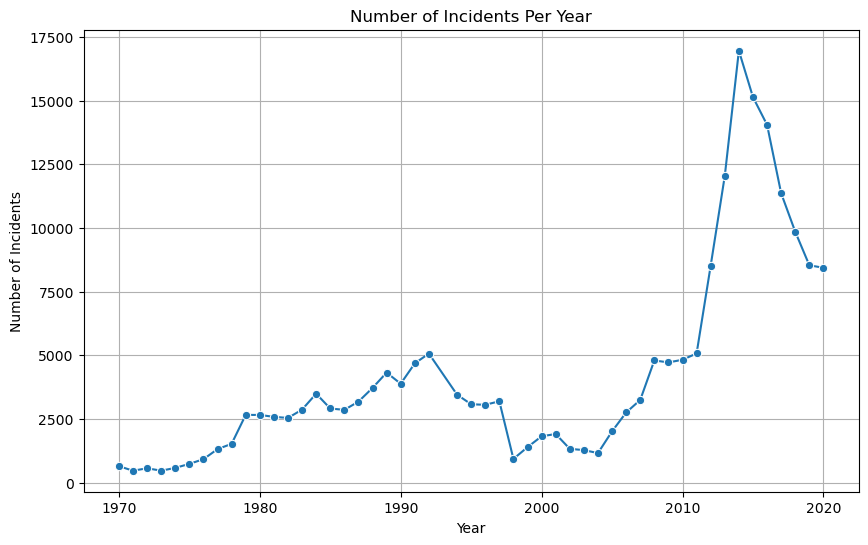

In [36]:
# 1. Plot incidents per year
incidents_per_year = df2.groupby('Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values, marker='o')
plt.title("Number of Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()

# conclusion: number of incidents peaked in 2014 and have been decreasing since.

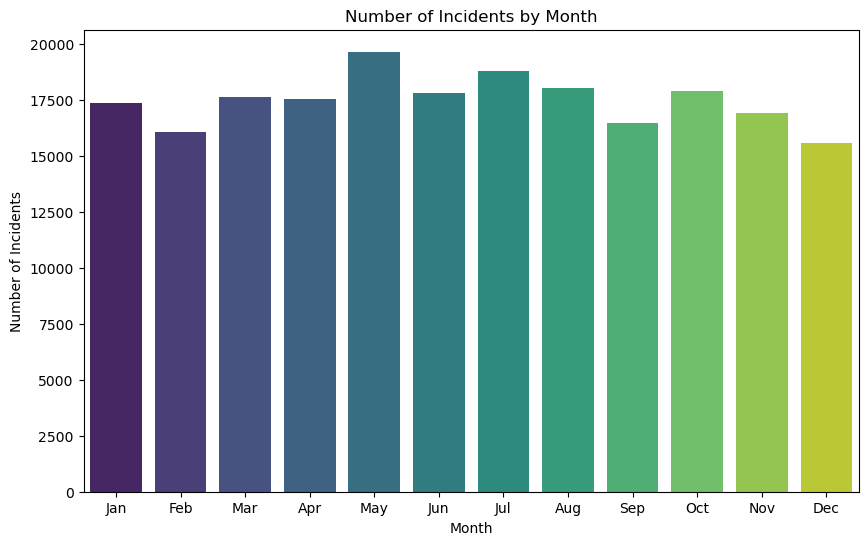

In [38]:
# 2. Plot incidents per month
incidents_per_month = df2.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=incidents_per_month.index, y=incidents_per_month.values, palette='viridis')
plt.title("Number of Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# conclusion: the odds of terrorism occuring in any given month are almost the same as
#             every other month  

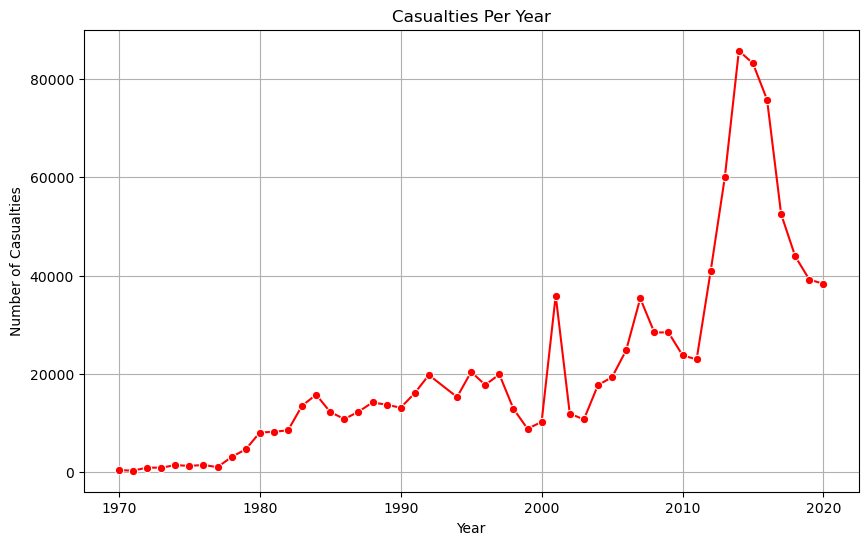

In [40]:
# 3. Casualties (Killed + Wounded) over time
df2['Casualties'] = df2['Killed'].fillna(0) + df2['Wounded'].fillna(0)
casualties_per_year = df2.groupby('Year')['Casualties'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, marker='o', color='red')
plt.title("Casualties Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.grid(True)
plt.show()

# conclusion: casualties peaked in 2014 and have been decreasing since.

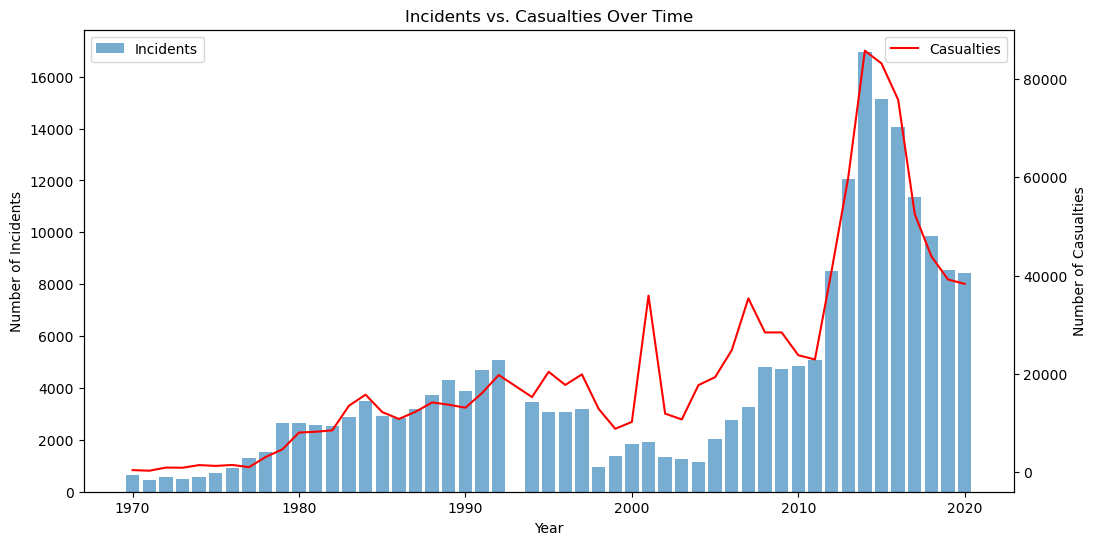

In [42]:
# 4. Compare incidents and casualties over time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(incidents_per_year.index, incidents_per_year.values, alpha=0.6, label="Incidents")
ax2.plot(casualties_per_year.index, casualties_per_year.values, color='red', label="Casualties")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Incidents")
ax2.set_ylabel("Number of Casualties")
ax1.set_title("Incidents vs. Casualties Over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

# conclusoin: rate of casualties to incidents peaked in 2001.

# Geographical Analysis

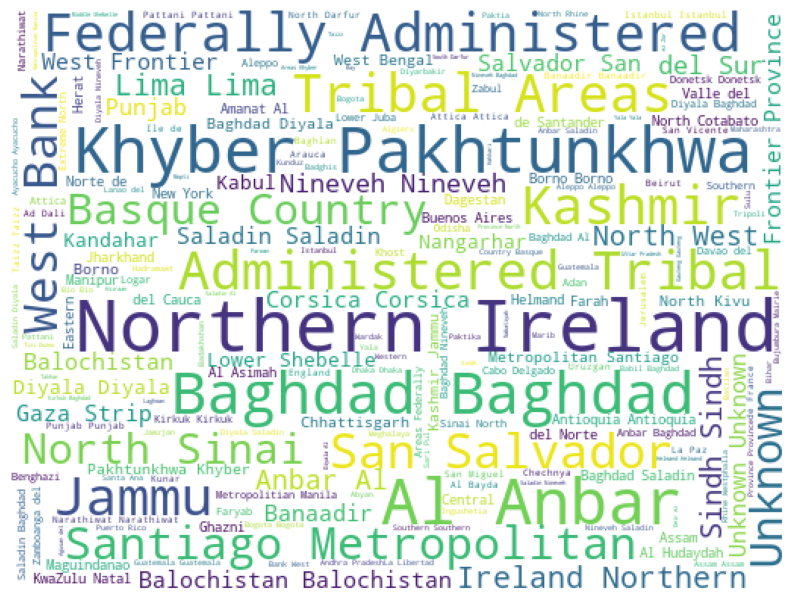

done


In [44]:
# WordCloud representing Areas most affected with terrorism

cities = df2.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
print('done')

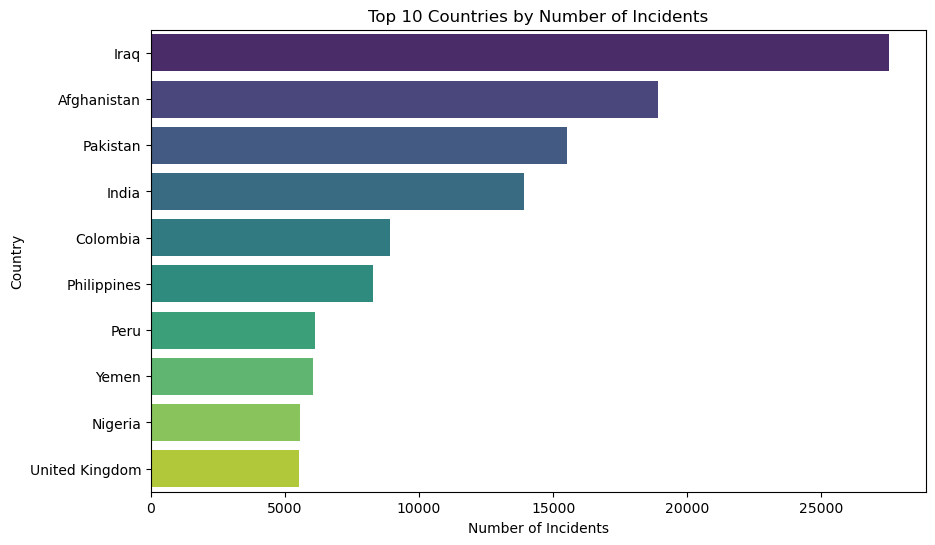

In [46]:
# Top 10 countries by number of incidents
top_countries_incidents = df2['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries_incidents.index, x=top_countries_incidents.values, palette='viridis')
plt.title("Top 10 Countries by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.show()

# conclusion: The country with the highest number of incidents is Iraq.

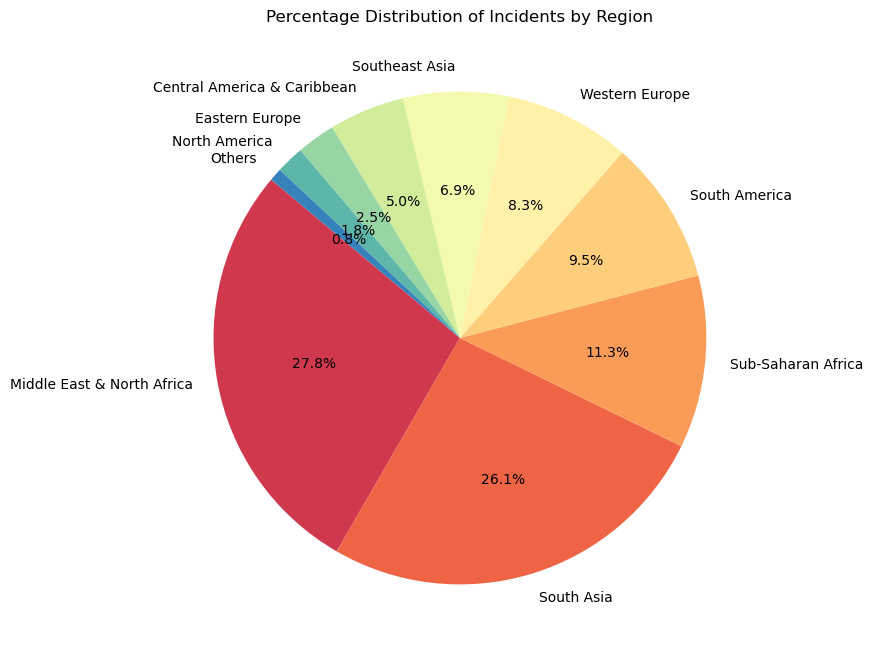

In [48]:
# Regional distribution of incidents
region_distribution = df2['Region'].value_counts(normalize=True) * 100

top_regions = region_distribution.head(9)
others = region_distribution[9:].sum()
top_regions['Others'] = others

plt.figure(figsize=(8, 8))
plt.pie(
    top_regions.values,
    labels=top_regions.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Spectral', len(top_regions))
)
plt.title("Percentage Distribution of Incidents by Region")
plt.show()

# conclusion: approx. 28% of incidents have occured in Middle East and North Africa.

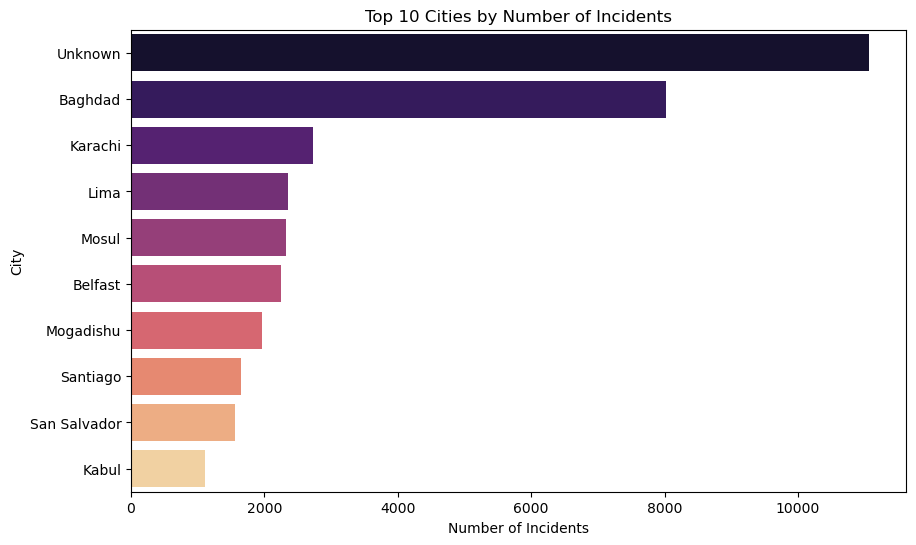

In [50]:
# 3. Top 10 cities by number of incidents
top_cities_incidents = df2['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_cities_incidents.index, x=top_cities_incidents.values, palette='magma')
plt.title("Top 10 Cities by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("City")
plt.show()

# conclusion: The most dangerous city is Baghdad with over 8000 incidents in last 50 years.

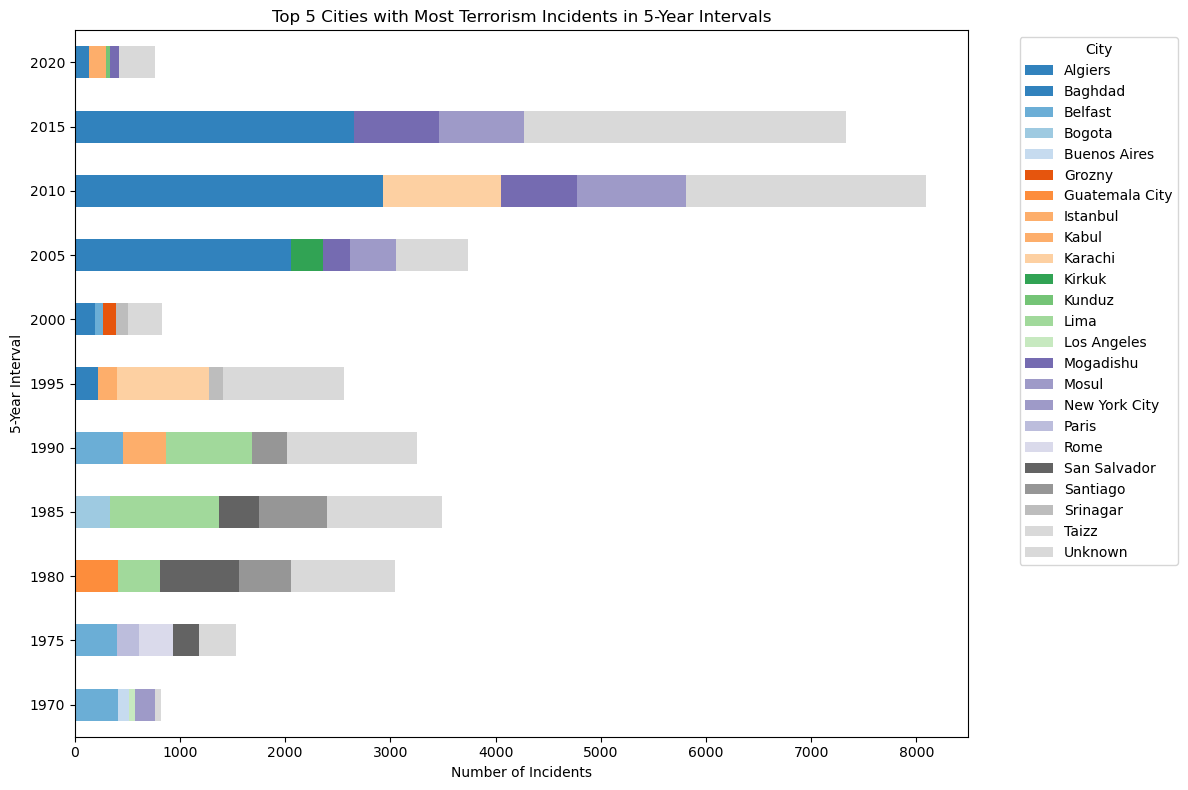

In [52]:
# Top 5 countries affected by terrorism every 5 years

df2['5yr_interval'] = (df2['Year'] // 5) * 5

# Group by city and 5-year interval, count incidents
city_terrorism = df2.groupby(['5yr_interval', 'city']).size().reset_index(name='Incidents')

# Find the top 5 cities for each interval
top_cities = city_terrorism.groupby('5yr_interval').apply(
    lambda x: x.nlargest(5, 'Incidents')
).reset_index(drop=True)

# Pivot the data for horizontal stacked bar chart
pivot_data = top_cities.pivot(index='5yr_interval', columns='city', values='Incidents').fillna(0)

# Plot the horizontal stacked bar chart
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title("Top 5 Cities with Most Terrorism Incidents in 5-Year Intervals")
plt.xlabel("Number of Incidents")
plt.ylabel("5-Year Interval")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


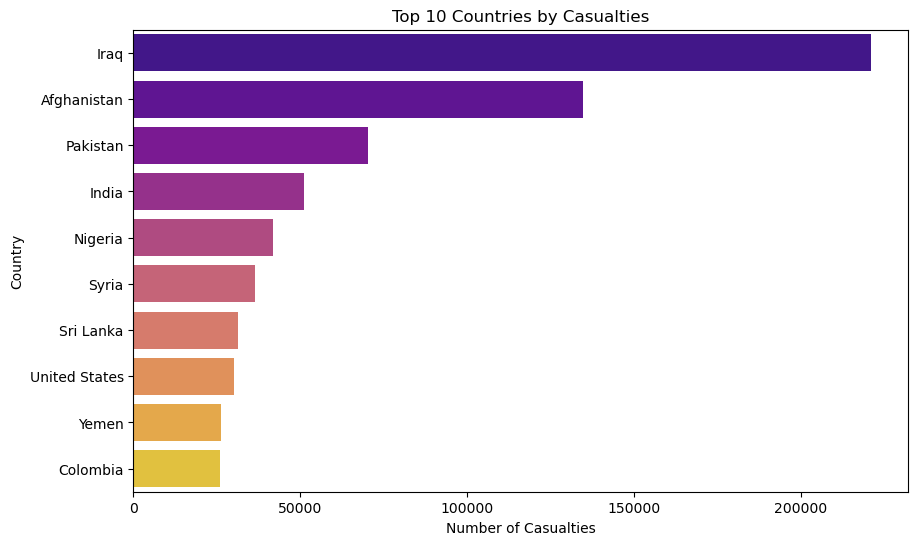

In [53]:
# 4. Top 10 countries by casualties
top_countries_casualties = df2.groupby('Country')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries_casualties.index, x=top_countries_casualties.values, palette='plasma')
plt.title("Top 10 Countries by Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Country")
plt.show()

# conclusion: Most number of casualties occured in Iraq which is reflective of the number 
#             of in Iraq.

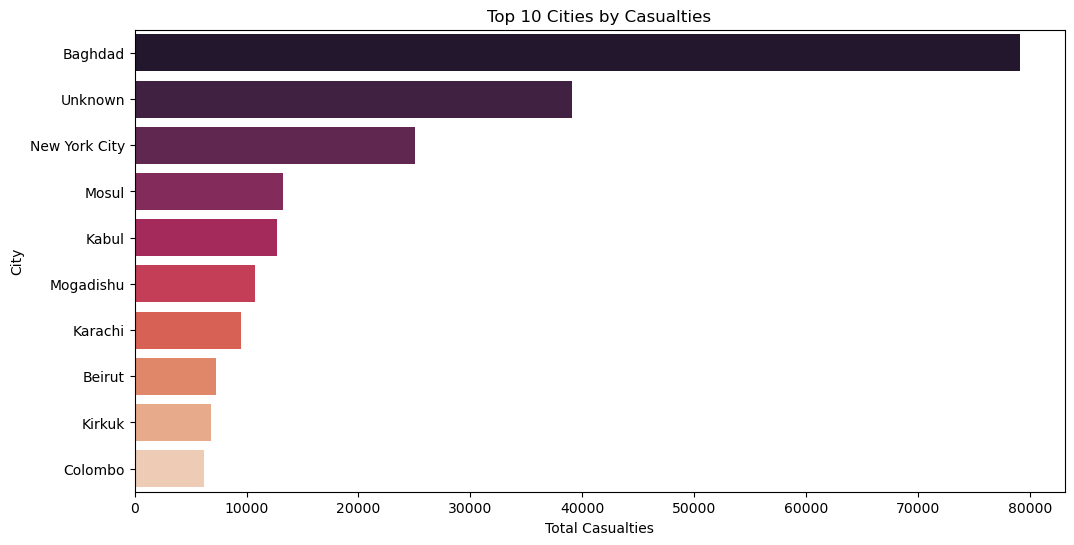

In [56]:
# 5. Top 10 cities by casualties
top_cities = df2.groupby('city')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='rocket')
plt.title("Top 10 Cities by Casualties")
plt.xlabel("Total Casualties")
plt.ylabel("City")
plt.show()

# conclusion: most casulaties in one city occured in Baghdad.

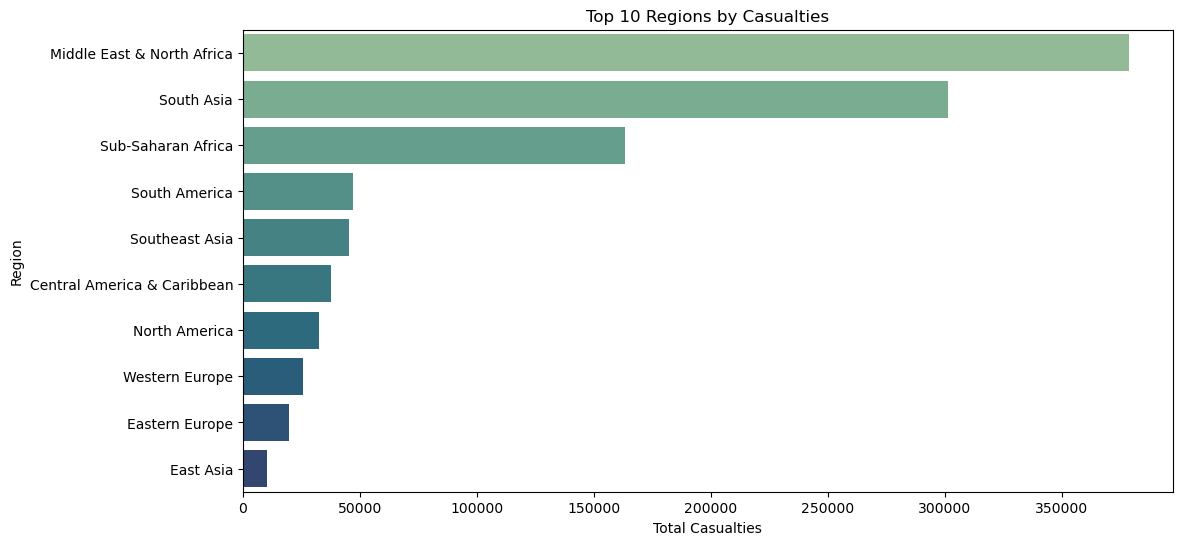

In [58]:
# 6. Top 10 regions by casualties
top_regions = df2.groupby('Region')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_regions.index, x=top_regions.values, palette='crest')
plt.title("Top 10 Regions by Casualties")
plt.xlabel("Total Casualties")
plt.ylabel("Region")
plt.show()

# conclusion: most casualties in one region occured in Middle East and North Africa.

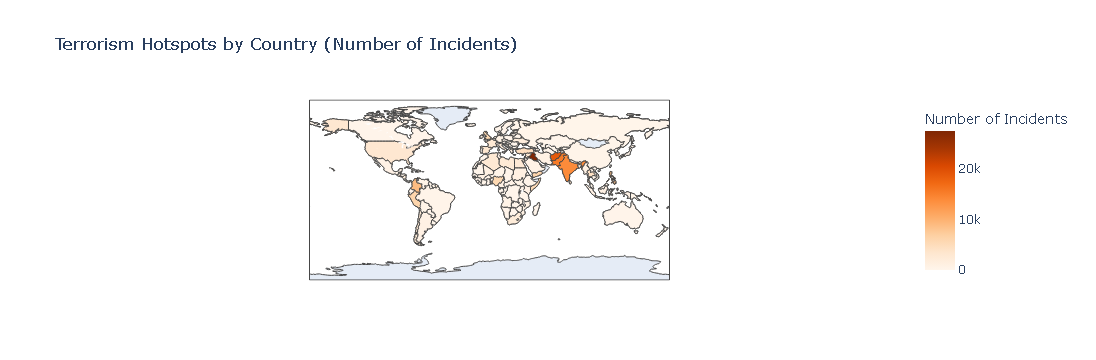

In [60]:
# Choropleth of Terrorism hotspots

country_incidents = df2['Country'].value_counts().reset_index()
country_incidents.columns = ['Country', 'Number of Incidents']

fig = px.choropleth(
    country_incidents,
    locations='Country',
    locationmode='country names',
    color='Number of Incidents',
    hover_name='Country',
    title="Terrorism Hotspots by Country (Number of Incidents)",
    color_continuous_scale='Oranges',
    labels={'Number of Incidents': 'Number of Incidents'},
)

fig.show()

# Terrorism Analysis in Pakistan

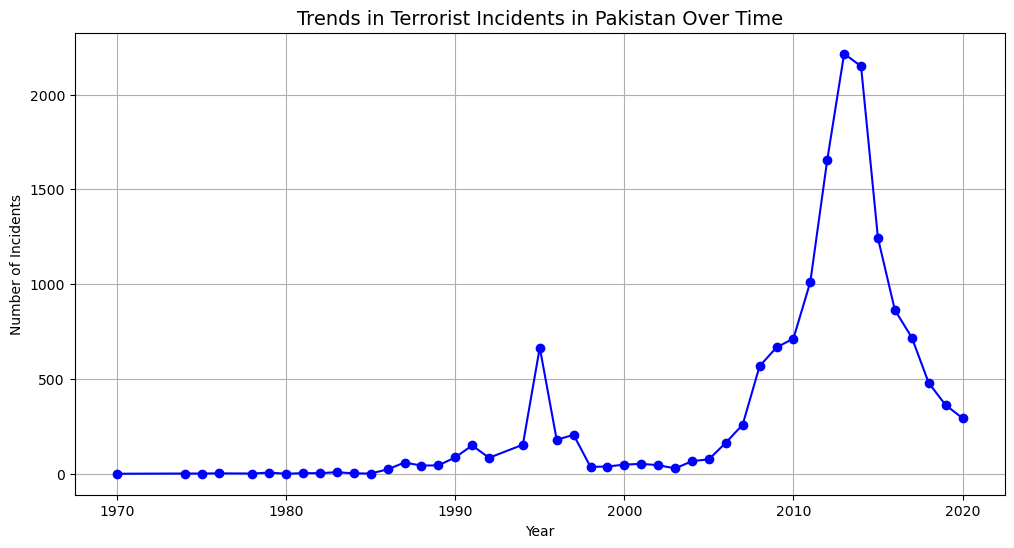

In [87]:
# Filter data for Pakistan
pakistan_data = df[df['country_txt'] == 'Pakistan']

# Trends in Terrorist Incidents Over Time
yearly_incidents = pakistan_data['iyear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o', color='b')
plt.title("Trends in Terrorist Incidents in Pakistan Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()

# This insight analyzes the yearly frequency of terrorist attacks in Pakistan to identify patterns and periods of escalation or decline.

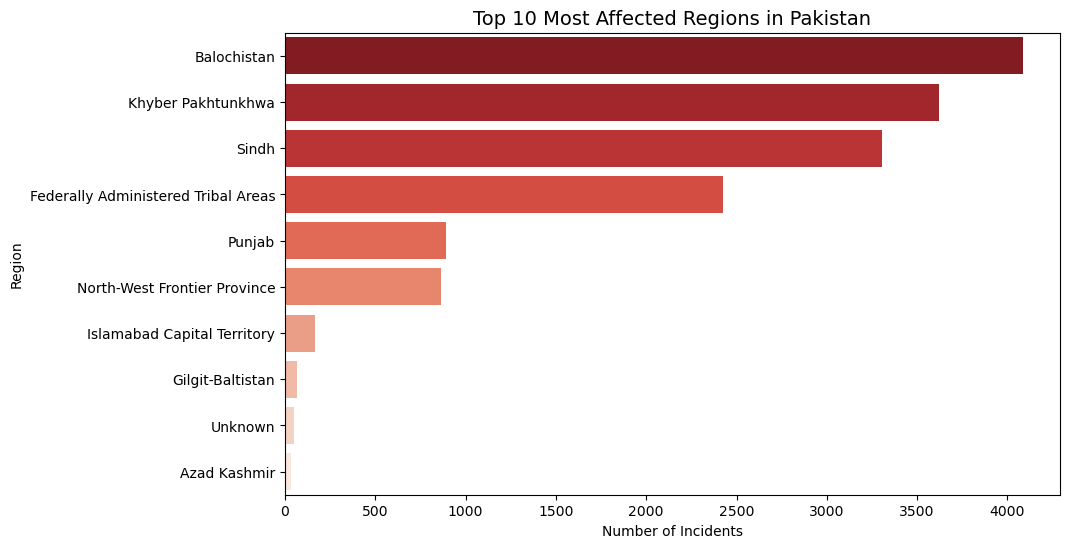

In [89]:
# Most Affected Regions
top_regions = pakistan_data['provstate'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="Reds_r")
plt.title("Top 10 Most Affected Regions in Pakistan", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Region")
plt.show()

# This insight highlights the regions within Pakistan most frequently targeted by terrorist activities.

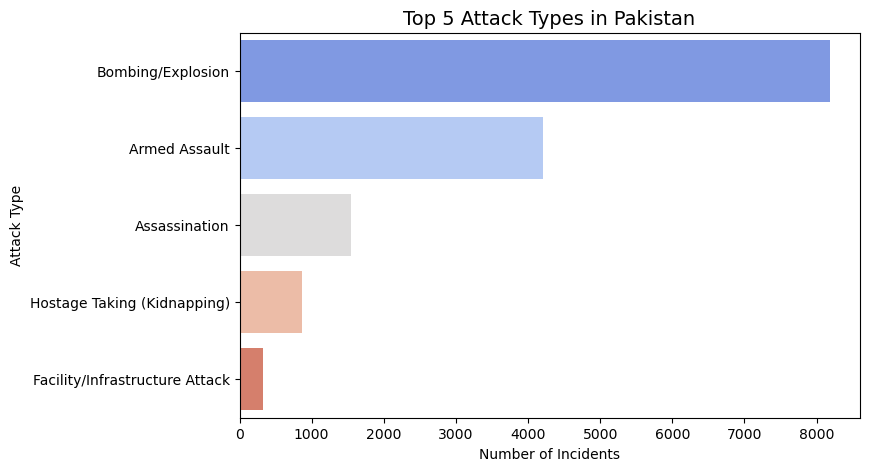

In [91]:
# Most Common Attack Types
attack_types = pakistan_data['attacktype1_txt'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=attack_types.values, y=attack_types.index, palette="coolwarm")
plt.title("Top 5 Attack Types in Pakistan", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Attack Type")
plt.show()

# Most Common Attack Types in Pakistan

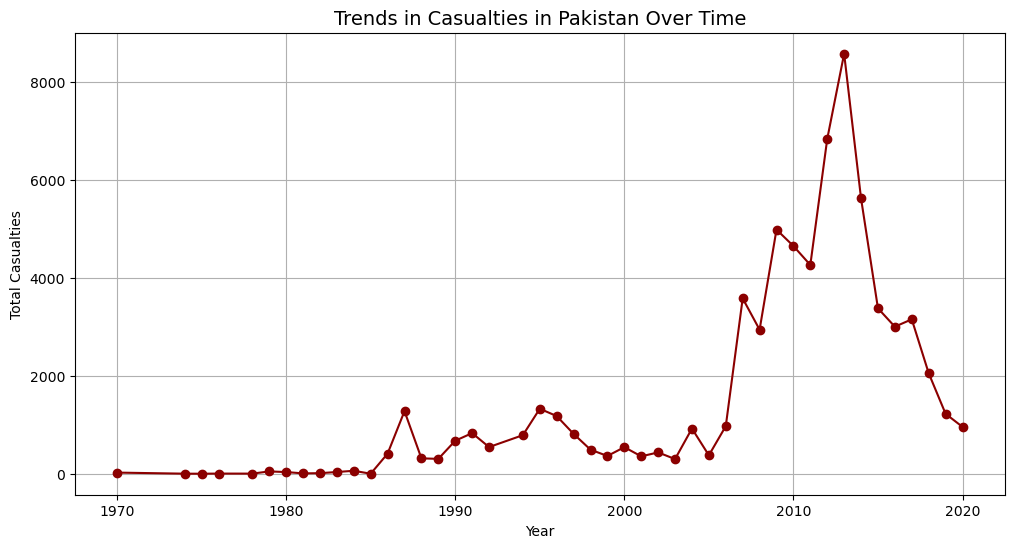

In [93]:
# Casualties Over Time in Pakistan
pakistan_data['total_casualties'] = pakistan_data['nkill'] + pakistan_data['nwound']
yearly_casualties = pakistan_data.groupby('iyear')['total_casualties'].sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_casualties.index, yearly_casualties.values, marker='o', color='darkred')
plt.title("Trends in Casualties in Pakistan Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Casualties")
plt.grid(True)
plt.show()

# This insight examines trends in the number of casualties (killed and wounded) in Pakistan over the years.

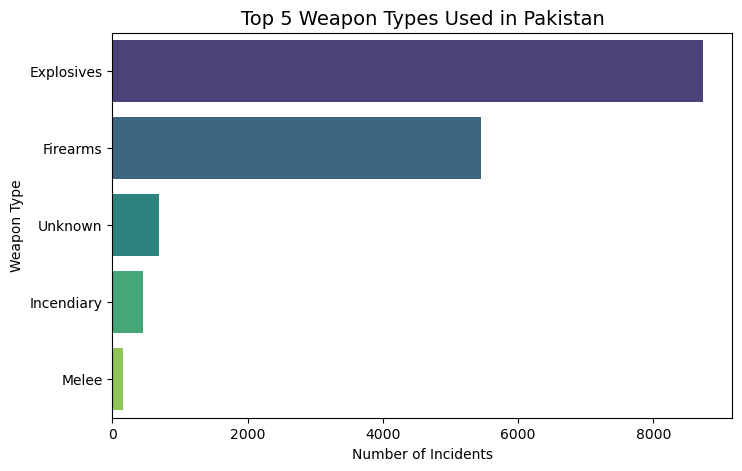

In [95]:
# Weapon Types Used in Pakistan
weapon_types = pakistan_data['weaptype1_txt'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=weapon_types.values, y=weapon_types.index, palette="viridis")
plt.title("Top 5 Weapon Types Used in Pakistan", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Weapon Type")
plt.show()
# This insight focuses on the most commonly used weapon types in terrorist attacks in Pakistan.

The year with the highest number of incidents in Pakistan is 2013, with 2215 incidents.


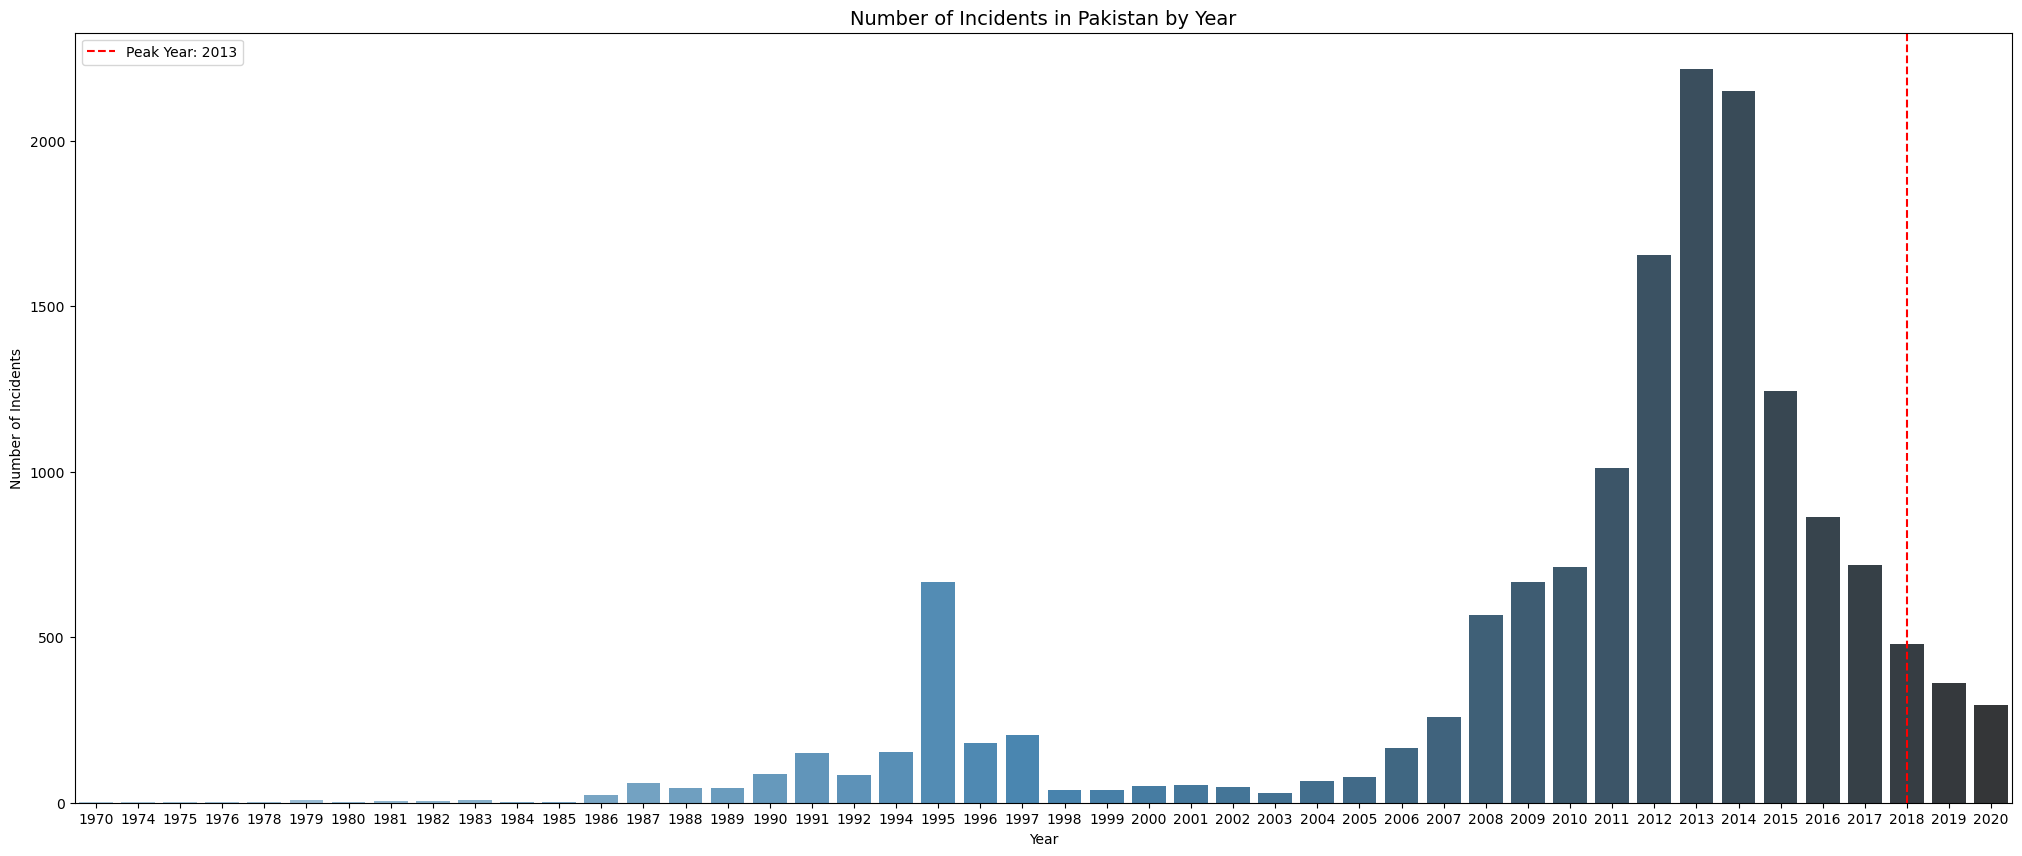

In [130]:
# Year with the Highest Number of Incidents
yearly_incidents = pakistan_data['iyear'].value_counts()
highest_year = yearly_incidents.idxmax()
highest_incidents = yearly_incidents.max()

print(f"The year with the highest number of incidents in Pakistan is {highest_year}, with {highest_incidents} incidents.")

# Visualization
plt.figure(figsize=(25, 10))
sns.barplot(x=yearly_incidents.index, y=yearly_incidents.values, palette="Blues_d")
plt.title("Number of Incidents in Pakistan by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.axvline(x=highest_year - min(yearly_incidents.index), color='red', linestyle='--', label=f'Peak Year: {highest_year}')
plt.legend()
plt.show()

# Identifies the year with the maximum number of terrorist incidents in Pakistan, providing insights into periods of heightened activity.

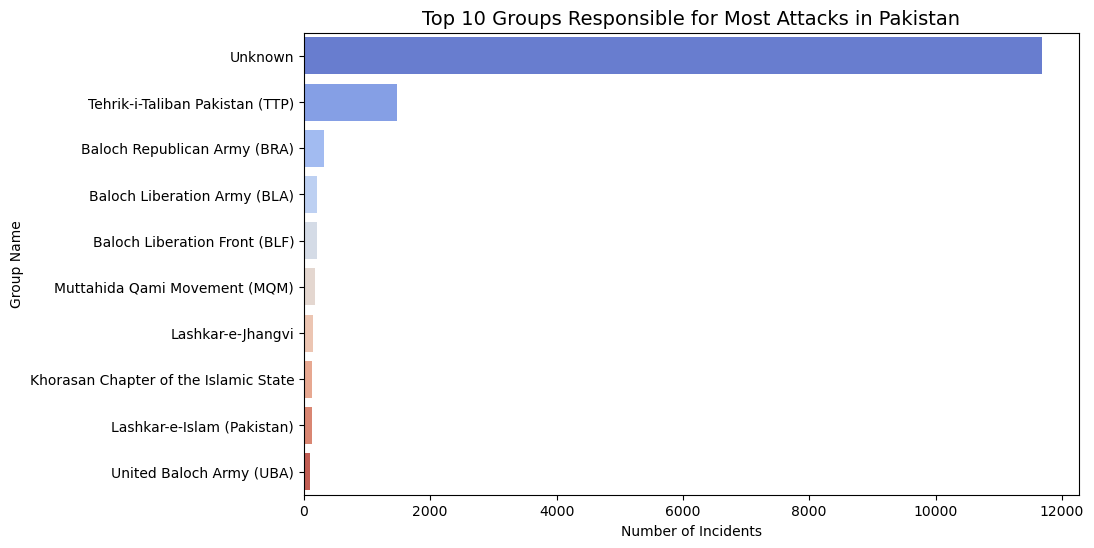

In [109]:
# Groups Responsible for Most Attacks
top_groups = pakistan_data['gname'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_groups.values, y=top_groups.index, palette="coolwarm")
plt.title("Top 10 Groups Responsible for Most Attacks in Pakistan", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Group Name")
plt.show()

# Highlights the terrorist groups responsible for the most attacks, helping to identify major actors.

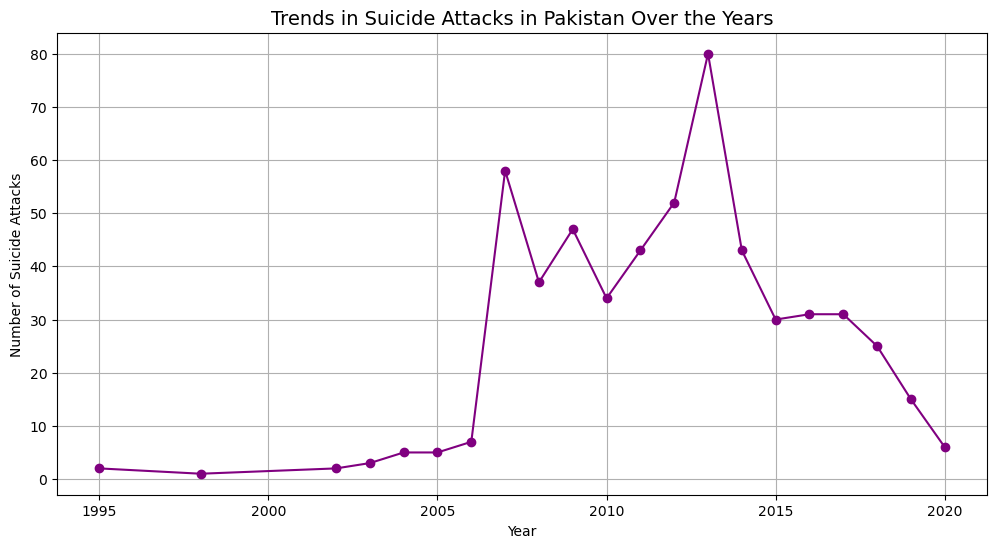

In [111]:
# Suicide Attacks Over the Years
suicide_attacks = pakistan_data[pakistan_data['suicide'] == 1]
yearly_suicide = suicide_attacks['iyear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_suicide.index, yearly_suicide.values, marker='o', color='purple')
plt.title("Trends in Suicide Attacks in Pakistan Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Suicide Attacks")
plt.grid(True)
plt.show()

# Analyzes the frequency of suicide attacks over time, revealing trends in this specific type of attack.

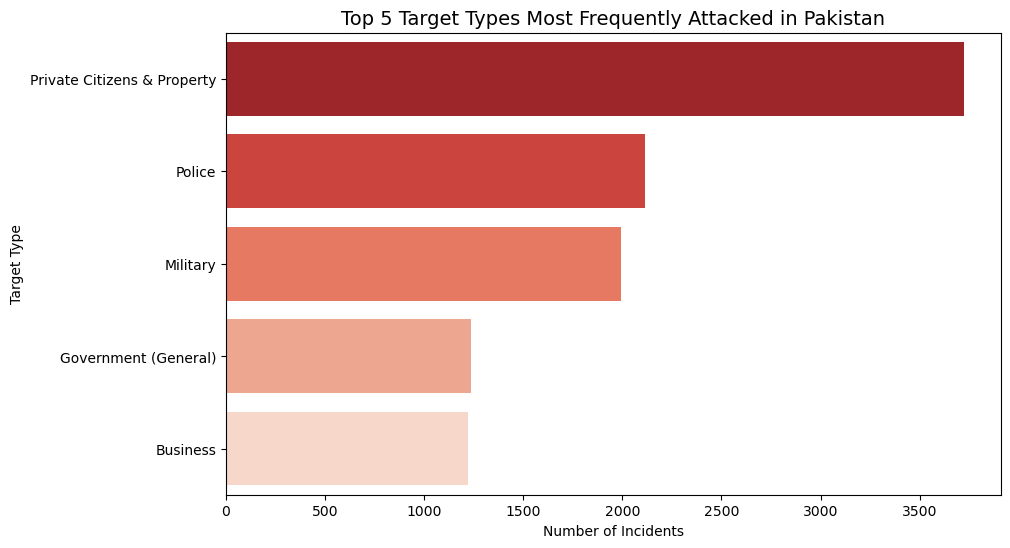

In [113]:
# Most Affected Target Types
top_targets = pakistan_data['targtype1_txt'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_targets.values, y=top_targets.index, palette="Reds_r")
plt.title("Top 5 Target Types Most Frequently Attacked in Pakistan", fontsize=14)
plt.xlabel("Number of Incidents")
plt.ylabel("Target Type")
plt.show()
# Examines the categories of targets most frequently attacked in Pakistan, such as civilians, military, or infrastructure.

# Analysis of Attack Characteristics 

In [62]:
# Fill missing values for analysis
df2['AttackType'] = df2['AttackType'].fillna('Unknown')
df2['Target_type'] = df2['Target_type'].fillna('Unknown')
df2['Weapon_type'] = df2['Weapon_type'].fillna('Unknown')

# Total casualties
df2['Casualties'] = df2['Killed'] + df2['Wounded']

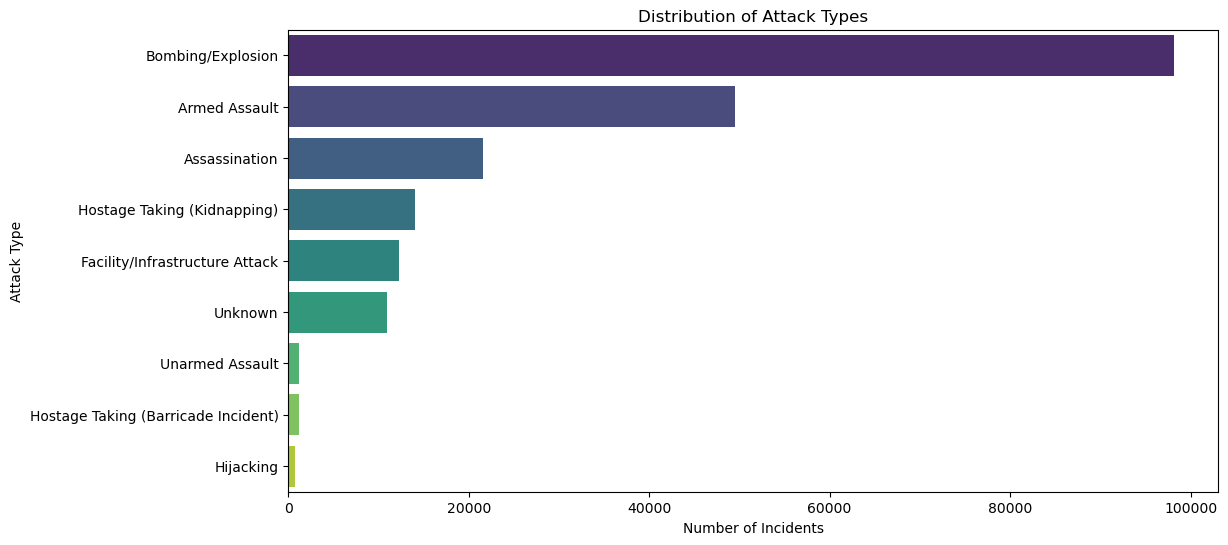

In [63]:
# 1. Distribution of Attack Types
attack_type_counts = df2['AttackType'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=attack_type_counts.index, x=attack_type_counts.values, palette='viridis')
plt.title("Distribution of Attack Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Attack Type")
plt.show()

# conclusion: most common attack type is Bombing followed by Armed Assault.

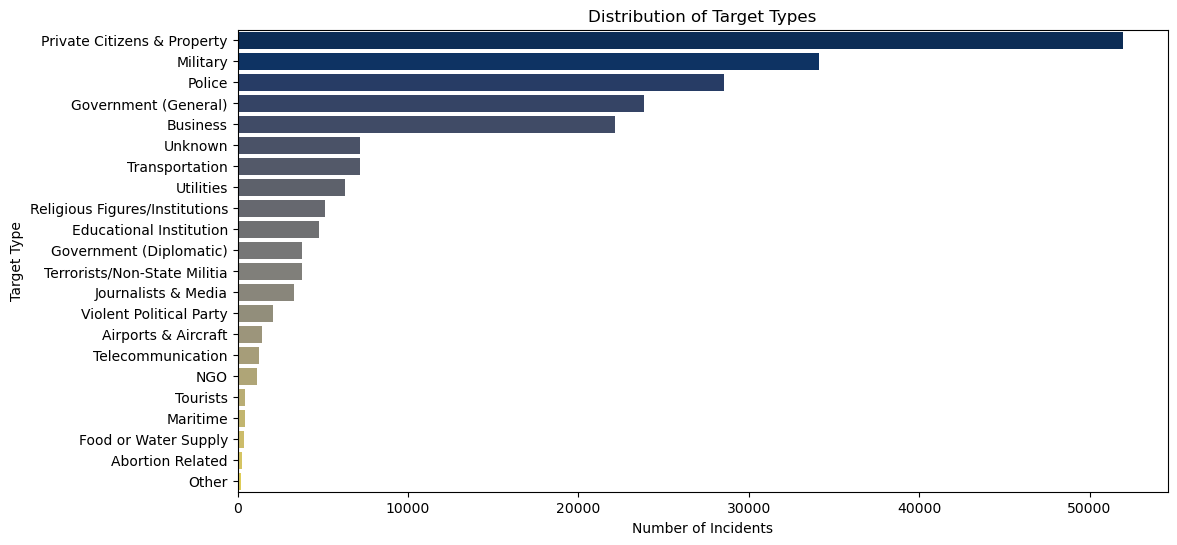

In [66]:
# 2. Distribution of Target Types
target_type_counts = df2['Target_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=target_type_counts.index, x=target_type_counts.values, palette='cividis')
plt.title("Distribution of Target Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Target Type")
plt.show()

# conclusion: after Private Citizens, Military, Police, Government, and Buisnesses are 
#             most common targets

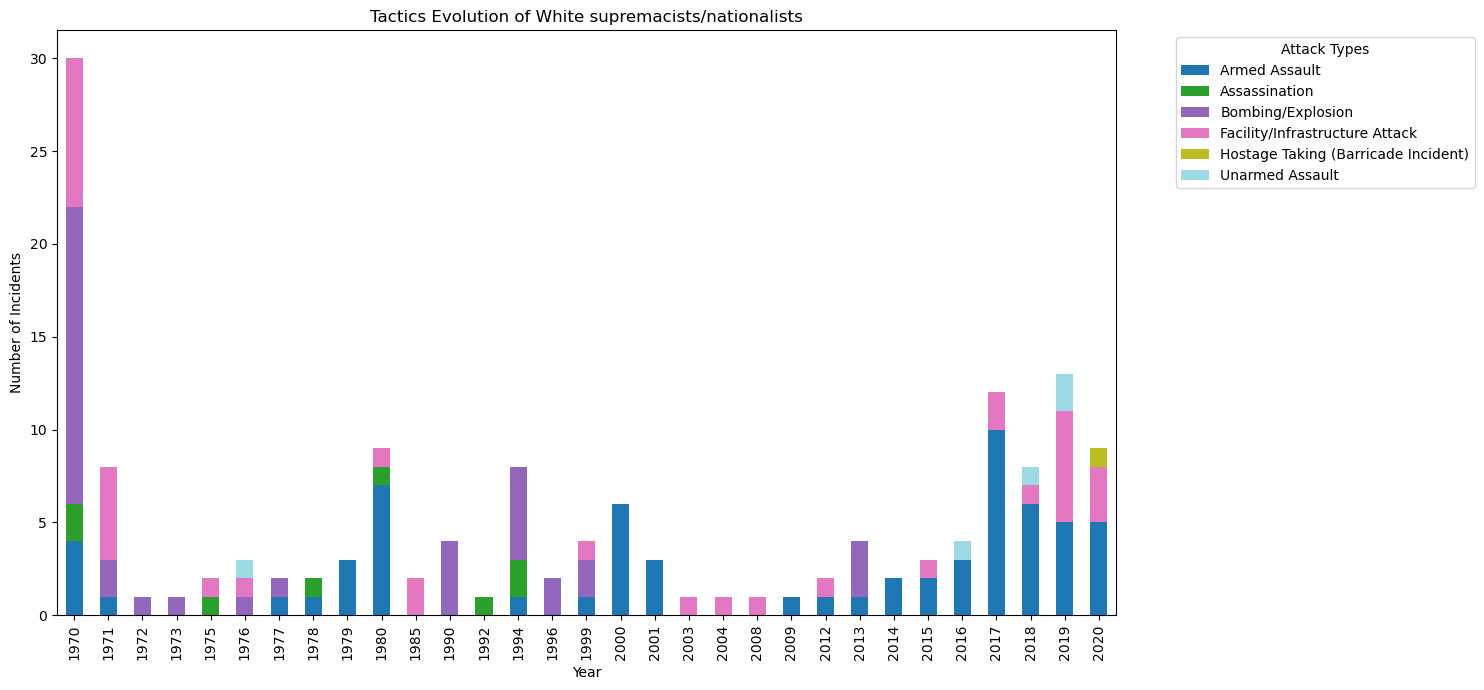

In [68]:
# 3. Tactics Evolution Analysis of most active group

group_activity = df2.groupby('Group').agg(
    first_incident=('Date', 'min'),
    last_incident=('Date', 'max'),
    num_incidents=('Date', 'count')
)

group_activity['longevity_years'] = (group_activity['last_incident'] - group_activity['first_incident']).dt.days / 365

group_activity_filtered = group_activity[group_activity.index != 'Unknown'].sort_values(by='longevity_years', ascending=False)

top_longevity = group_activity_filtered.head(30)

longest_active_group = top_longevity.index[0]  # The group with the longest activity
group_tactics = df2[df2['Group'] == longest_active_group]

group_tactics['Year'] = group_tactics['Date'].dt.year
tactics_over_time = group_tactics.groupby(['Year', 'AttackType']).size().unstack(fill_value=0)

tactics_over_time.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title(f"Tactics Evolution of {longest_active_group}")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Attack Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


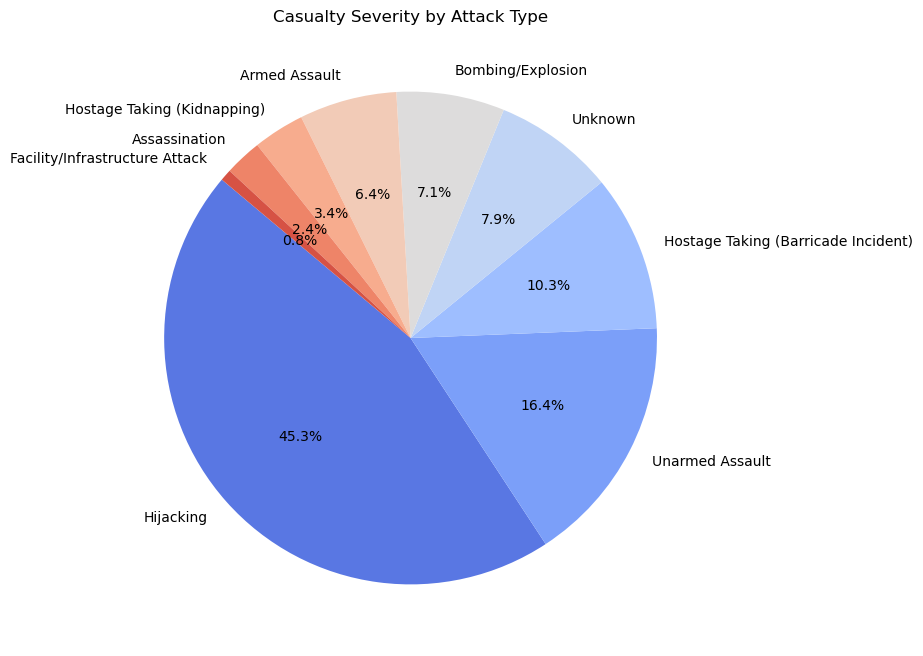

In [70]:
# 4. Casualty Severity by Attack Type

severity = df2.groupby('AttackType')['Casualties'].mean().sort_values(ascending=False)

# Plotting Casualty Severity by Attack Type as a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    severity.values,
    labels=severity.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(severity))
)
plt.title('Casualty Severity by Attack Type')
plt.show()


# Actor Analysis

In [74]:
# Fill missing values
df2['Group'] = df2['Group'].fillna('Unknown')

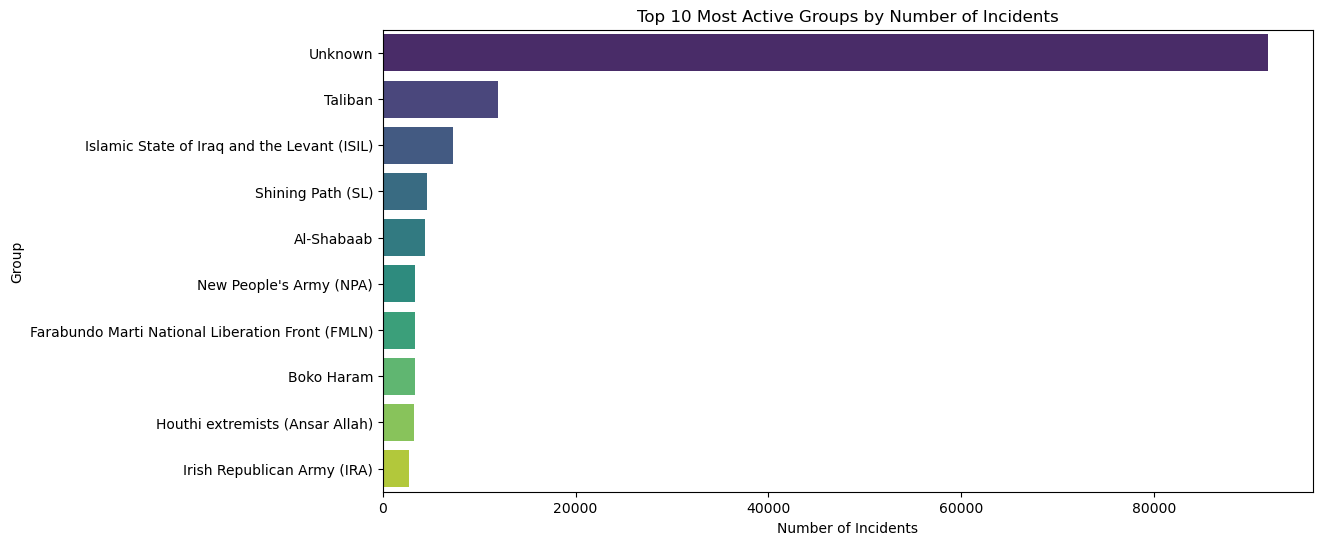

In [76]:
# 1. Most Active Groups
group_counts = df2['Group'].value_counts().head(10)  # Top 10 most active groups

plt.figure(figsize=(12, 6))
sns.barplot(y=group_counts.index, x=group_counts.values, palette='viridis')
plt.title("Top 10 Most Active Groups by Number of Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Group")
plt.show()

# Conclusion: ignoring incidents by unknown groups, Taliban are responsible for most incidents.

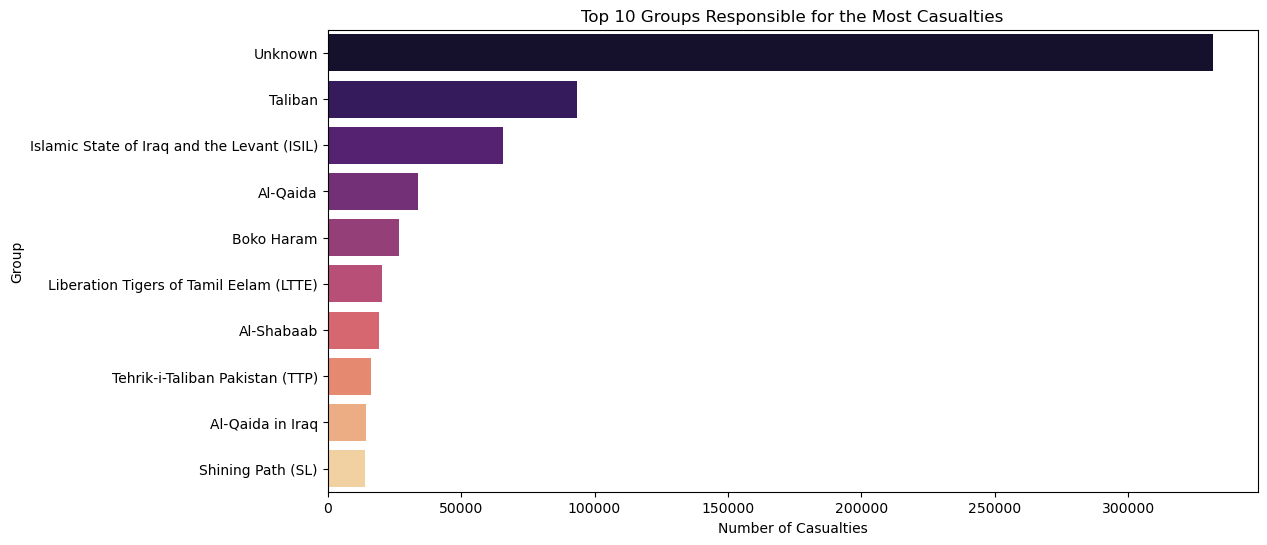

In [78]:
# 2. Groups Responsible for the Most Casualties
group_casualties = df2.groupby('Group')['Casualties'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=group_casualties.index, x=group_casualties.values, palette='magma')
plt.title("Top 10 Groups Responsible for the Most Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Group")
plt.show()

# conclusion: ignoring casualties by unknown groups, Taliban are responsible for most casualties.

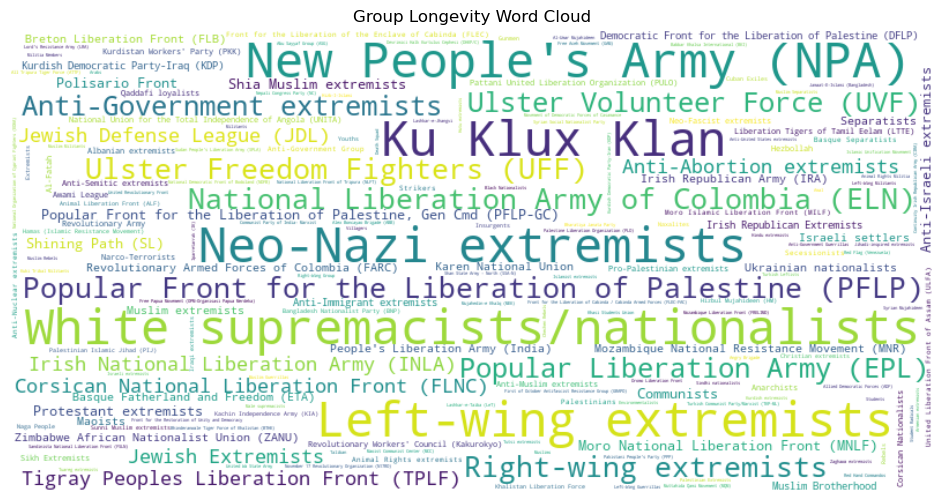

In [79]:
# 3. Groups with Longest Activity 

group_activity['longevity_years'] = (group_activity['last_incident'] - group_activity['first_incident']).dt.days / 365

group_activity_filtered = group_activity[group_activity.index != 'Unknown'].sort_values(by='longevity_years', ascending=False)

group_activity_filtered_sorted = group_activity_filtered.reset_index()

wordcloud_data = dict(zip(group_activity_filtered_sorted['Group'], group_activity_filtered_sorted['longevity_years']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Group Longevity Word Cloud")
plt.show()
